<a href="https://colab.research.google.com/github/noushadkhan01/internshala/blob/master/internshala_INSAID_Sample_Skeleton.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# INSAID Hiring Exercise

## Important: Kindly go through the instructions mentioned below.

- The Sheet is structured in **4 steps**:
    1. Understanding data and manipulation
    2. Data visualization
    3. Implementing Machine Learning models(Note: It should be more than 1 algorithm)
    4. Model Evaluation and concluding with the best of the model.
    
    
    

- Try to break the codes in the **simplest form** and use number of code block with **proper comments** to them
- We are providing **h** different dataset to choose from(Note: You need to select any one of the dataset from this sample sheet only)
- The **interview calls** will be made solely based on how good you apply the **concepts**.
- Good Luck! Happy Coding!

# Importing the data

In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# use these links to do so:
df = pd.read_csv('https://bit.ly/2Qq259J')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


# Understanding the data

In [3]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


### understanding data using pandas profile report

In [0]:
from pandas_profiling import ProfileReport

In [5]:
html = ProfileReport(df)

/usr/local/lib/python3.6/dist-packages/pandas_profiling/describe.py:392: FutureWarning: The join_axes-keyword is deprecated. Use .reindex or .reindex_like on the result to achieve the same functionality.
  variable_stats = pd.concat(ldesc, join_axes=pd.Index([names]), axis=1)


In [0]:
html = html.to_file('profile_report.html')

from google.colab import files

files.download('profile_report.html')

[data set profile report](https://datascienceprojects01.blogspot.com/2020/03/internshala-project-profile-report.html)

##check for null values

In [7]:
df.isnull().sum().sort_values(ascending = False)[:3]

Churn             0
OnlineSecurity    0
gender            0
dtype: int64

**^As we can see there is no null columns in our dataset**

# Data Manipulation

In [8]:
categorical_data = df.select_dtypes(include = 'object')
categorical_data.head(2)

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
0,7590-VHVEG,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,No
1,5575-GNVDE,Male,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,1889.5,No


In [9]:
categorical_data.columns

Index(['customerID', 'gender', 'Partner', 'Dependents', 'PhoneService',
       'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup',
       'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies',
       'Contract', 'PaperlessBilling', 'PaymentMethod', 'TotalCharges',
       'Churn'],
      dtype='object')

In [10]:
#type of TotalCharges column values
type(categorical_data.TotalCharges.values[0])

str

^As we can see there is a categorical column name **TotalCharges** which is actually a numerical data so we need to convert it in numeric form

In [0]:
#get the index which have non numeric TotalCharges values
indexes = []
for n, i in enumerate(df.TotalCharges):
  try:
    np.float64(i)
  except:
    indexes.append(n)

In [12]:
indexes

[488, 753, 936, 1082, 1340, 3331, 3826, 4380, 5218, 6670, 6754]

In [13]:
#values
df.loc[indexes].TotalCharges.values

array([' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' ', ' '],
      dtype=object)

In [0]:
def convertToFloat(x):
  try:
    return np.float64(x.strip())
  except:
    return np.nan

In [0]:
import numpy as np
df['TotalCharges'] = df['TotalCharges'].apply(convertToFloat)

In [16]:
df.head(2)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No


In [17]:
#now check the type of TotalCharges column values
type(df.TotalCharges.values[0])

numpy.float64

In [18]:
df.isnull().sum().sort_values(ascending = False)[:3]

TotalCharges      11
Churn              0
OnlineSecurity     0
dtype: int64

In [19]:
plt.scatter(x = df.MonthlyCharges, y = df.TotalCharges)

In [20]:
numeric_data = df.select_dtypes(exclude = 'object')
numeric_data.head(2)

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0,1,29.85,29.85
1,0,34,56.95,1889.50


In [0]:
import seaborn as sns
%matplotlib inline

##OneHotEncoding

In [0]:
df.drop(['customerID'], axis = 1, inplace = True) #as there is no use of customerID in our machine learning model

In [23]:
categorical_columns = df.select_dtypes(include = 'object') #select categorical columns
categorical_columns.head(1)

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No


In [24]:
categorical_columns.shape

(7043, 16)

###my methods

I have created **my methods** repository on github to follow **DRY** principle

those methods are created by myself from scratch kindly visit [this](https://github.com/noushadkhan01/my_methods)

In [25]:
!git clone https://github.com/noushadkhan01/my_methods.git

Cloning into 'my_methods'...
remote: Enumerating objects: 89, done.
remote: Counting objects: 100% (89/89), done.
remote: Compressing objects: 100% (89/89), done.
remote: Total 396 (delta 50), reused 0 (delta 0), pack-reused 307
Receiving objects: 100% (396/396), 102.44 KiB | 2.28 MiB/s, done.
Resolving deltas: 100% (235/235), done.


[my methods](https://github.com/noushadkhan01/my_methods)

In [26]:
%cd my_methods

/content/my_methods


In [27]:
!ls

choose_best_classifier.py	      my_global_variables.py
choose_best_regressor.py	      my_roc_curve.py
choose_optimal_number_of_clusters.py  plot_text.py
get_cross_validation.py		      print_model_results.py
initialize_weights.py		      README.md
my_backward_propagation.py	      sgd_neural_net.py
my_cap_curve.py			      visualise_classifier_performance.py
my_dummy_variable_creator.py


In [0]:
from print_model_results import print_model_results

In [0]:
#its a methods to save models
import my_global_variables

In [0]:
#initialize my global variable
my_global_variables.init()

In [0]:
from my_dummy_variable_creator import MyDummyVariable

[my dummy variable creator](https://github.com/noushadkhan01/my_methods/blob/master/my_dummy_variable_creator.py)

In [32]:
ohe = MyDummyVariable() #create instance of MYDummyVariable class
print(ohe)

MyDummyVariable(drop_first = True, categorical_features = None,
 			      all_categorical = False ,return_dataframe = True,     labeld_features = None, all_labeled = False, unique_threshold = 5, drop_na = False)


In [33]:
data = ohe.fit_transform(df) #fit_transofrm dataframe
data.head(2)

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,29.85,29.85
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,34.0,56.95,1889.50


**separate features and target**

In [0]:
y = data.Churn_Yes
X = data.drop(['Churn_Yes'], axis = 1)

In [35]:
X.head(1)

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,29.85,29.85


fill **TotalCharges** column's null values with mean of it

In [0]:
X.TotalCharges.fillna(X.TotalCharges.mean(), inplace = True)

In [37]:
X.isnull().any().sum() #check if the features have any null values

0

## validation data
get validation data for further model evaluation

**select random indexes for validation dataset**

In [38]:
validate_index = np.random.randint(0, len(X), size = (30))
validate_index[:3]

array([3735, 6404, 4290])

In [39]:
X_validation = X.loc[validate_index]
X_validation.head(2)

,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_No phone service,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
3735,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,2.0,84.05,134.05
6404,1.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,52.0,109.30,5731.40


In [40]:
y_validation = y.loc[validate_index]
y_validation[:10]

3735    0.0
6404    0.0
4290    1.0
3952    0.0
4186    0.0
6359    0.0
3107    0.0
38      1.0
5662    1.0
2786    0.0
Name: Churn_Yes, dtype: float64

In [0]:
X.drop(validate_index, inplace = True) #drop X_validation data from the X

In [0]:
y.drop(validate_index, inplace = True) #drop y_validation from the y

In [43]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state = 0)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5610, 30), (1403, 30), (5610,), (1403,))

#Data Visualisation

In [44]:
#numeric columns in our dataset
df.select_dtypes(exclude = 'object').columns

Index(['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges'], dtype='object')

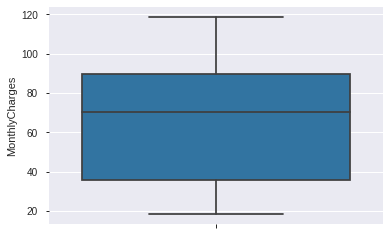

In [45]:
sns.boxplot(df.MonthlyCharges, orient = 'vertical')

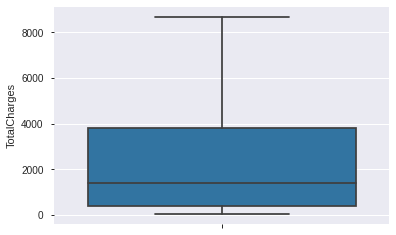

In [46]:
sns.boxplot(df.TotalCharges, orient = 'vertical')

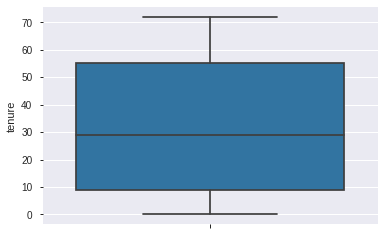

In [47]:
sns.boxplot(df.tenure, orient = 'vertical')

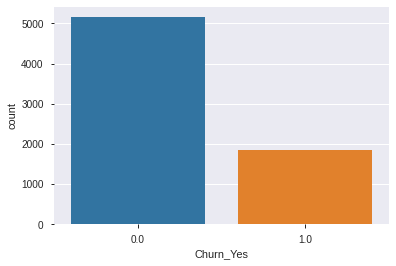

In [48]:
#check frequency of each class in our dataset
sns.countplot(y)

### Conclusion: What all did you understand from the above charts
**there is a class imbalance in our dataset so we need to balance the class using ``SVMSMOTE``**

# Implement Machine Learning Models

In [49]:
!ls 

choose_best_classifier.py	      my_global_variables.py
choose_best_regressor.py	      my_roc_curve.py
choose_optimal_number_of_clusters.py  plot_text.py
get_cross_validation.py		      print_model_results.py
initialize_weights.py		      __pycache__
my_backward_propagation.py	      README.md
my_cap_curve.py			      sgd_neural_net.py
my_dummy_variable_creator.py	      visualise_classifier_performance.py


##choose best classifier with **imbalanced classes**
**choose which classifier is best for our model with default parameters**

In [0]:
from choose_best_classifier import choose_best_classifier

[see code of **choose best classifier**](https://github.com/noushadkhan01/my_methods/blob/master/choose_best_classifier.py)

In [0]:
import warnings

In [0]:
warnings.filterwarnings(action = 'ignore') #ignore warnings

model name:-- scores mean, (scores variance)
PCA with LR: -- 0.7851144681387192, (0.014045240027025112)
Logistic Regression: -- 0.8016551446651304, (0.0072510913822738075)
LDA: -- 0.7968043210553909, (0.009857376291878245)
KNN: -- 0.7628678607280605, (0.00996771770227946)
DTree: -- 0.7627282555242612, (0.012804890231560064)
RandomForest: -- 0.7955190184148815, (0.01104211215429258)
Naive Bayes: -- 0.661911351711637, (0.019537757967750254)
SVM: -- 0.7347787653779094, (0.012086407242717393)
Xgboost: -- 0.8019374032212834, (0.012272092023115272)
 Done

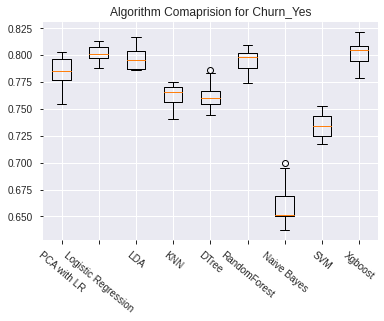

In [53]:
choose_best_classifier(X, y)

^According to this **Logistic Regression** is best for this dataset

In [54]:
!ls

choose_best_classifier.py	      my_global_variables.py
choose_best_regressor.py	      my_roc_curve.py
choose_optimal_number_of_clusters.py  plot_text.py
get_cross_validation.py		      print_model_results.py
initialize_weights.py		      __pycache__
my_backward_propagation.py	      README.md
my_cap_curve.py			      sgd_neural_net.py
my_dummy_variable_creator.py	      visualise_classifier_performance.py


**print model results**

its a methods created by me, which print train score, test score, 
train confusion matrix , test confusion matrix, test classification report

In [0]:
from print_model_results import print_model_results

[see **print model results** at github](https://github.com/noushadkhan01/my_methods/blob/master/print_model_results.py)

In [0]:
#import LogisticRegression
from sklearn.linear_model import LogisticRegression

In [0]:
#create model
model = LogisticRegression()

In [59]:
#print model results
print_model_results(X_train, X_test, y_train, y_test, model)

 Train score is 0.8067736185383244


Test score is 0.8104062722736992



Train confusion matrix is 
 [[3702  420]
 [ 664  824]]

Test confusion matrix is 
 [[940  91]
 [175 197]]



Test Set classification report is 
               precision    recall  f1-score   support

         0.0       0.84      0.91      0.88      1031
         1.0       0.68      0.53      0.60       372

    accuracy                           0.81      1403
   macro avg       0.76      0.72      0.74      1403
weighted avg       0.80      0.81      0.80      1403



LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [60]:
my_global_variables.my_models

{'LogisticRegression': LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                    intercept_scaling=1, l1_ratio=None, max_iter=100,
                    multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False)}

**^As we can see there is a low recall for class 1.0**

##choose best classifier with **balanced classes**
There is a class imbalance in our dataset so we need to balance the class such that both classes have the same 

In [0]:
from imblearn.over_sampling import SMOTE

In [0]:
sm = SMOTE(random_state = 2)

In [63]:
X_sm, y_sm = sm.fit_sample(X, y)
X_sm.shape, y_sm.shape

((10306, 30), (10306,))

model name:-- scores mean, (scores variance)
PCA with LR: -- 0.7076431591536165, (0.012904111011118012)
Logistic Regression: -- 0.7512167468665544, (0.017724474030377836)
LDA: -- 0.7495713465105986, (0.02122973603680692)
KNN: -- 0.7611347263943952, (0.05774075467845028)
DTree: -- 0.8235358262785683, (0.08208263065801763)
RandomForest: -- 0.849443277805505, (0.08417045183583181)
Naive Bayes: -- 0.7412627009313232, (0.10717531904903181)
SVM: -- 0.6273742148729201, (0.07775533670835062)
Xgboost: -- 0.8609910257738269, (0.08800738955212696)
 Done

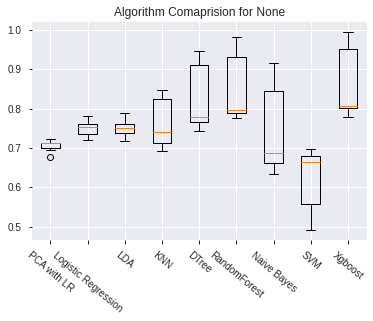

In [64]:
#check best classifier for balanced dataset
choose_best_classifier(X_sm, y_sm)

^^According to this **RandomForest** and **Xgboost** is best

but Random Forest cause overfitting sometimes

###RandomForestClassifier

In [0]:
from sklearn.ensemble import RandomForestClassifier

In [0]:
sm2 = SMOTE(random_state = 2)

In [0]:
X_train_sm, y_train_sm = sm2.fit_sample(X_train, y_train)

In [68]:
X_train_sm.shape, y_train_sm.shape

((8244, 30), (8244,))

In [69]:
X_test_sm, y_test_sm = sm2.fit_resample(X_test, y_test)
X_test_sm.shape, y_test_sm.shape

((2062, 30), (2062,))

In [70]:
rf = RandomForestClassifier()
print_model_results(X_train_sm, X_test_sm, y_train_sm, y_test_sm, model = rf)

 Train score is 0.9986656962639495


Test score is 0.8385063045586809



Train confusion matrix is 
 [[4115    7]
 [   4 4118]]

Test confusion matrix is 
 [[915 116]
 [217 814]]



Test Set classification report is 
               precision    recall  f1-score   support

         0.0       0.81      0.89      0.85      1031
         1.0       0.88      0.79      0.83      1031

    accuracy                           0.84      2062
   macro avg       0.84      0.84      0.84      2062
weighted avg       0.84      0.84      0.84      2062



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
from sklearn.metrics import confusion_matrix, classification_report

####for validation data

In [72]:
confusion_matrix(y_validation, rf.predict(X_validation))

array([[19,  2],
       [ 3,  6]])

####parameter tuning of **RandomForest** Classifier

**prevent overfitting**

In [0]:
import matplotlib.pyplot as plt

In [0]:
train_scores = []
test_scores = []
for i in range(2, 100):
  rf = RandomForestClassifier(n_estimators = 30, min_samples_split = i)
  rf.fit(X_train_sm, y_train_sm)
  train_scores.append(rf.score(X_train_sm, y_train_sm))
  test_scores.append(rf.score(X_test_sm, y_test_sm))

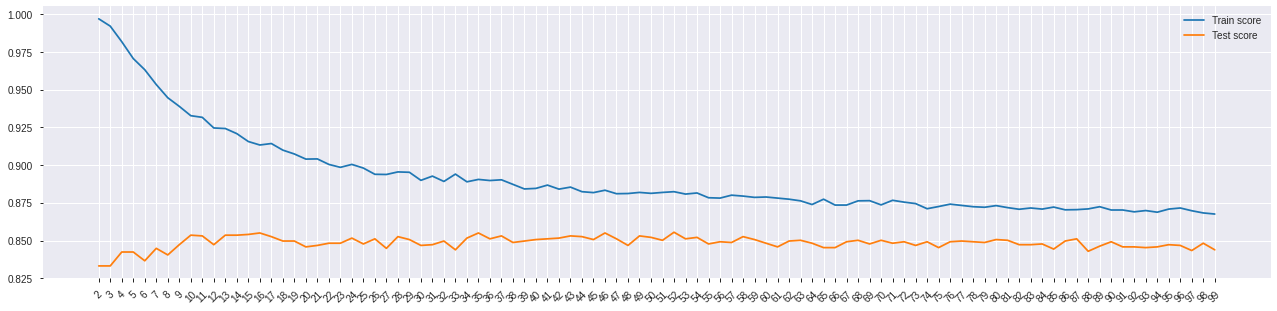

In [75]:
plt.figure(figsize = (22, 5))
plt.plot(range(2, 100), train_scores, label = 'Train score')
plt.plot(range(2, 100), test_scores, label = 'Test score')
plt.legend()
plt.xticks(ticks = range(2, 100), rotation = 45)
plt.show()

In [76]:
from sklearn.ensemble import RandomForestClassifier
from print_model_results import print_model_results
fmodel = RandomForestClassifier(n_estimators = 30, min_samples_split = 87)
print_model_results(X_train_sm, X_test_sm, y_train_sm, y_test_sm, fmodel)

 Train score is 0.8717855409995148


Test score is 0.8452958292919496



Train confusion matrix is 
 [[3607  515]
 [ 542 3580]]

Test confusion matrix is 
 [[886 145]
 [174 857]]



Test Set classification report is 
               precision    recall  f1-score   support

         0.0       0.84      0.86      0.85      1031
         1.0       0.86      0.83      0.84      1031

    accuracy                           0.85      2062
   macro avg       0.85      0.85      0.85      2062
weighted avg       0.85      0.85      0.85      2062



RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=87,
                       min_weight_fraction_leaf=0.0, n_estimators=30,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

###XgbClassifier

In [0]:
from xgboost import XGBClassifier

In [0]:
xgb = XGBClassifier(learning_rate= .04)

In [130]:
print_model_results(X_train_sm, X_test_sm, y_train_sm, y_test_sm, xgb)

 Train score is 0.8549247937894227


Test score is 0.8360814742967992



Train confusion matrix is 
 [[3410  712]
 [ 484 3638]]

Test confusion matrix is 
 [[845 186]
 [152 879]]



Test Set classification report is 
               precision    recall  f1-score   support

         0.0       0.85      0.82      0.83      1031
         1.0       0.83      0.85      0.84      1031

    accuracy                           0.84      2062
   macro avg       0.84      0.84      0.84      2062
weighted avg       0.84      0.84      0.84      2062



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.04, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [131]:
confusion_matrix(y_validation, xgb.predict(X_validation.values))

array([[19,  2],
       [ 0,  9]])

####for validation data

In [80]:
X_sm.shape, X_validation.shape

((10306, 30), (30, 30))

In [115]:
xgb = XGBClassifier(random_state=2, learning_rate=.04)
print_model_results(X_sm, X_validation.values, y_sm, y_validation, xgb)

 Train score is 0.8543566854259654


Test score is 0.9333333333333333



Train confusion matrix is 
 [[4304  849]
 [ 652 4501]]

Test confusion matrix is 
 [[19  2]
 [ 0  9]]



Test Set classification report is 
               precision    recall  f1-score   support

         0.0       1.00      0.90      0.95        21
         1.0       0.82      1.00      0.90         9

    accuracy                           0.93        30
   macro avg       0.91      0.95      0.93        30
weighted avg       0.95      0.93      0.94        30



XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.04, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=2,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

# Model Evaluation

##roc curve

In [0]:
from my_roc_curve import my_roc_curve

In [0]:
model = XGBClassifier(learning_rate=.04)

In [142]:
model.fit(X_train_sm, y_train_sm)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.04, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

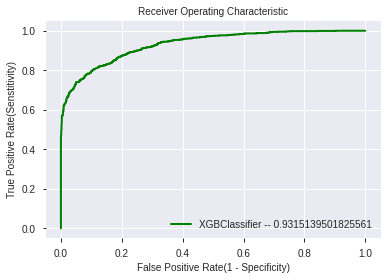

In [143]:
my_roc_curve(model, X_test_sm, y_test_sm, )

In [0]:
fpr, tpr, thresholds = my_global_variables.model_fpr_tpr_thresholds['XGBClassifier']

In [0]:
def evaluate_threshold(threshold):
    print('Sensitivity:', tpr[thresholds > threshold][-1])
    print('Specificity:', 1 - fpr[thresholds > threshold][-1])

In [147]:
evaluate_threshold(.5)

Sensitivity: 0.8525703200775946
Specificity: 0.8195926285160039


##cap curve

In [0]:
from my_cap_curve import my_cap_curve

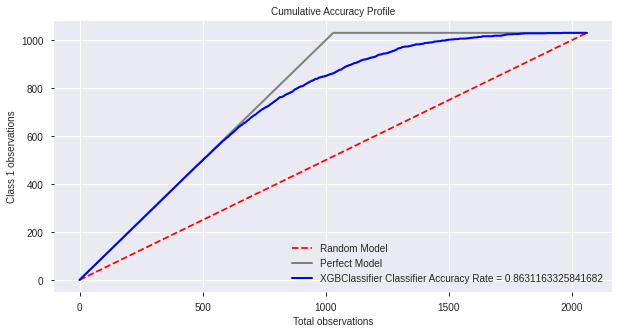

In [149]:
my_cap_curve(model, X_test_sm, y_test_sm, )

In [150]:
feature_importance = pd.DataFrame(np.array([X.columns, model.feature_importances_]).T, columns = ['feature_name', 'importance'])
feature_importance.head(1)

,feature_name,importance
0,gender_Male,0.00640751


In [151]:
feature_importance.sort_values(by = 'importance', ascending=False, inplace = True)
feature_importance.head(2)

,feature_name,importance
24,PaymentMethod_Electronic check,0.18877
20,Contract_One year,0.143694


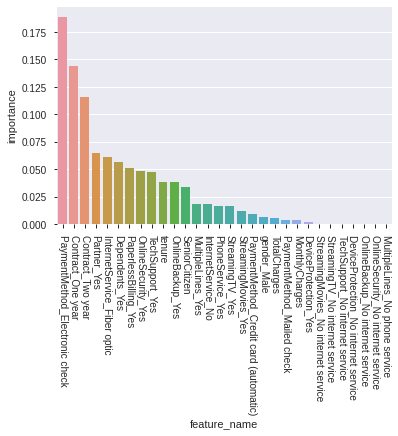

In [152]:
sns.barplot(x = 'feature_name', y = 'importance', data = feature_importance)
plt.xticks(rotation = -90)
plt.show()

# Final Conclusions

There is a hight impact of two features to our model
one is **PaymentMethod** and other is **Contract**

**PaymentMethod**


when Paymentmethod is **Electronic Check** there are hight chances that the customer discontinue the subscription

**Contract**


When contract is for **One Year** then there are hight chances that the customer discontinue the subscription